<a href="https://colab.research.google.com/github/fedenemi/practice_university_of_michigan/blob/main/asignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries and download dictionaries, texts which could be analysed
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
# from nltk.book import FreqDist
# from nltk.probability import FreqDist

from nltk.book import *
import collections
from nltk.corpus import words
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams


from nltk.metrics.distance import edit_distance

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
from nltk.corpus import wordnet as wn
import re
from sklearn.metrics import accuracy_score as ac
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import gensim

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus

True

In [ ]:
def convert_tag(tag):
    """Convert the tag given by nltk.pos_tag to the tag used by wordnet.synsets"""
    
    tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v'}
    try:
        return tag_dict[tag[0]]
    except KeyError:
        return None


def doc_to_synsets(doc):
    """
    Returns a list of synsets in document.

    Tokenizes and tags the words in the document doc.
    Then finds the first synset for each word/tag combination.
    If a synset is not found for that combination it is skipped.

    Args:
        doc: string to be converted

    Returns:
        list of synsets

    Example:
        doc_to_synsets('Fish are nvqjp friends.')
        Out: [Synset('fish.n.01'), Synset('be.v.01'), Synset('friend.n.01')]
    """
    

    # Your Code Here
    tokens=nltk.word_tokenize(doc)
    tags=[wn.synsets(tok[0], convert_tag(tok[1]))[0] for tok in nltk.pos_tag(tokens) if wn.synsets(tok[0], convert_tag(tok[1]))]
    
    return tags # Your Answer Here


def similarity_score(s1, s2):
    """
    Calculate the normalized similarity score of s1 onto s2

    For each synset in s1, finds the synset in s2 with the largest similarity value.
    Sum of all of the largest similarity values and normalize this value by dividing it by the
    number of largest similarity values found.

    Args:
        s1, s2: list of synsets from doc_to_synsets

    Returns:
        normalized similarity score of s1 onto s2

    Example:
        synsets1 = doc_to_synsets('I like cats')
        synsets2 = doc_to_synsets('I like dogs')
        similarity_score(synsets1, synsets2)
        Out: 0.73333333333333339
    """
    
    
    # Your Code Here
    li=[]

    for a in s1:
        l=[]
        for b in s2:
            l.append(wn.path_similarity(a,b))
        l=np.array(l,dtype=np.float64)
        li.append(np.nanmax(l))

    
    
    return np.mean(li)# Your Answer Here


def document_path_similarity(doc1, doc2):
    """Finds the symmetrical similarity between doc1 and doc2"""

    synsets1 = doc_to_synsets(doc1)
    synsets2 = doc_to_synsets(doc2)

    return (similarity_score(synsets1, synsets2) + similarity_score(synsets2, synsets1)) / 2



document_path_similarity('I like cats','I like dogs')

0.7333333333333334

In [ ]:
# Use this dataframe for questions most_similar_docs and label_accuracy
paraphrases = pd.read_csv('paraphrases.csv')
paraphrases.head()

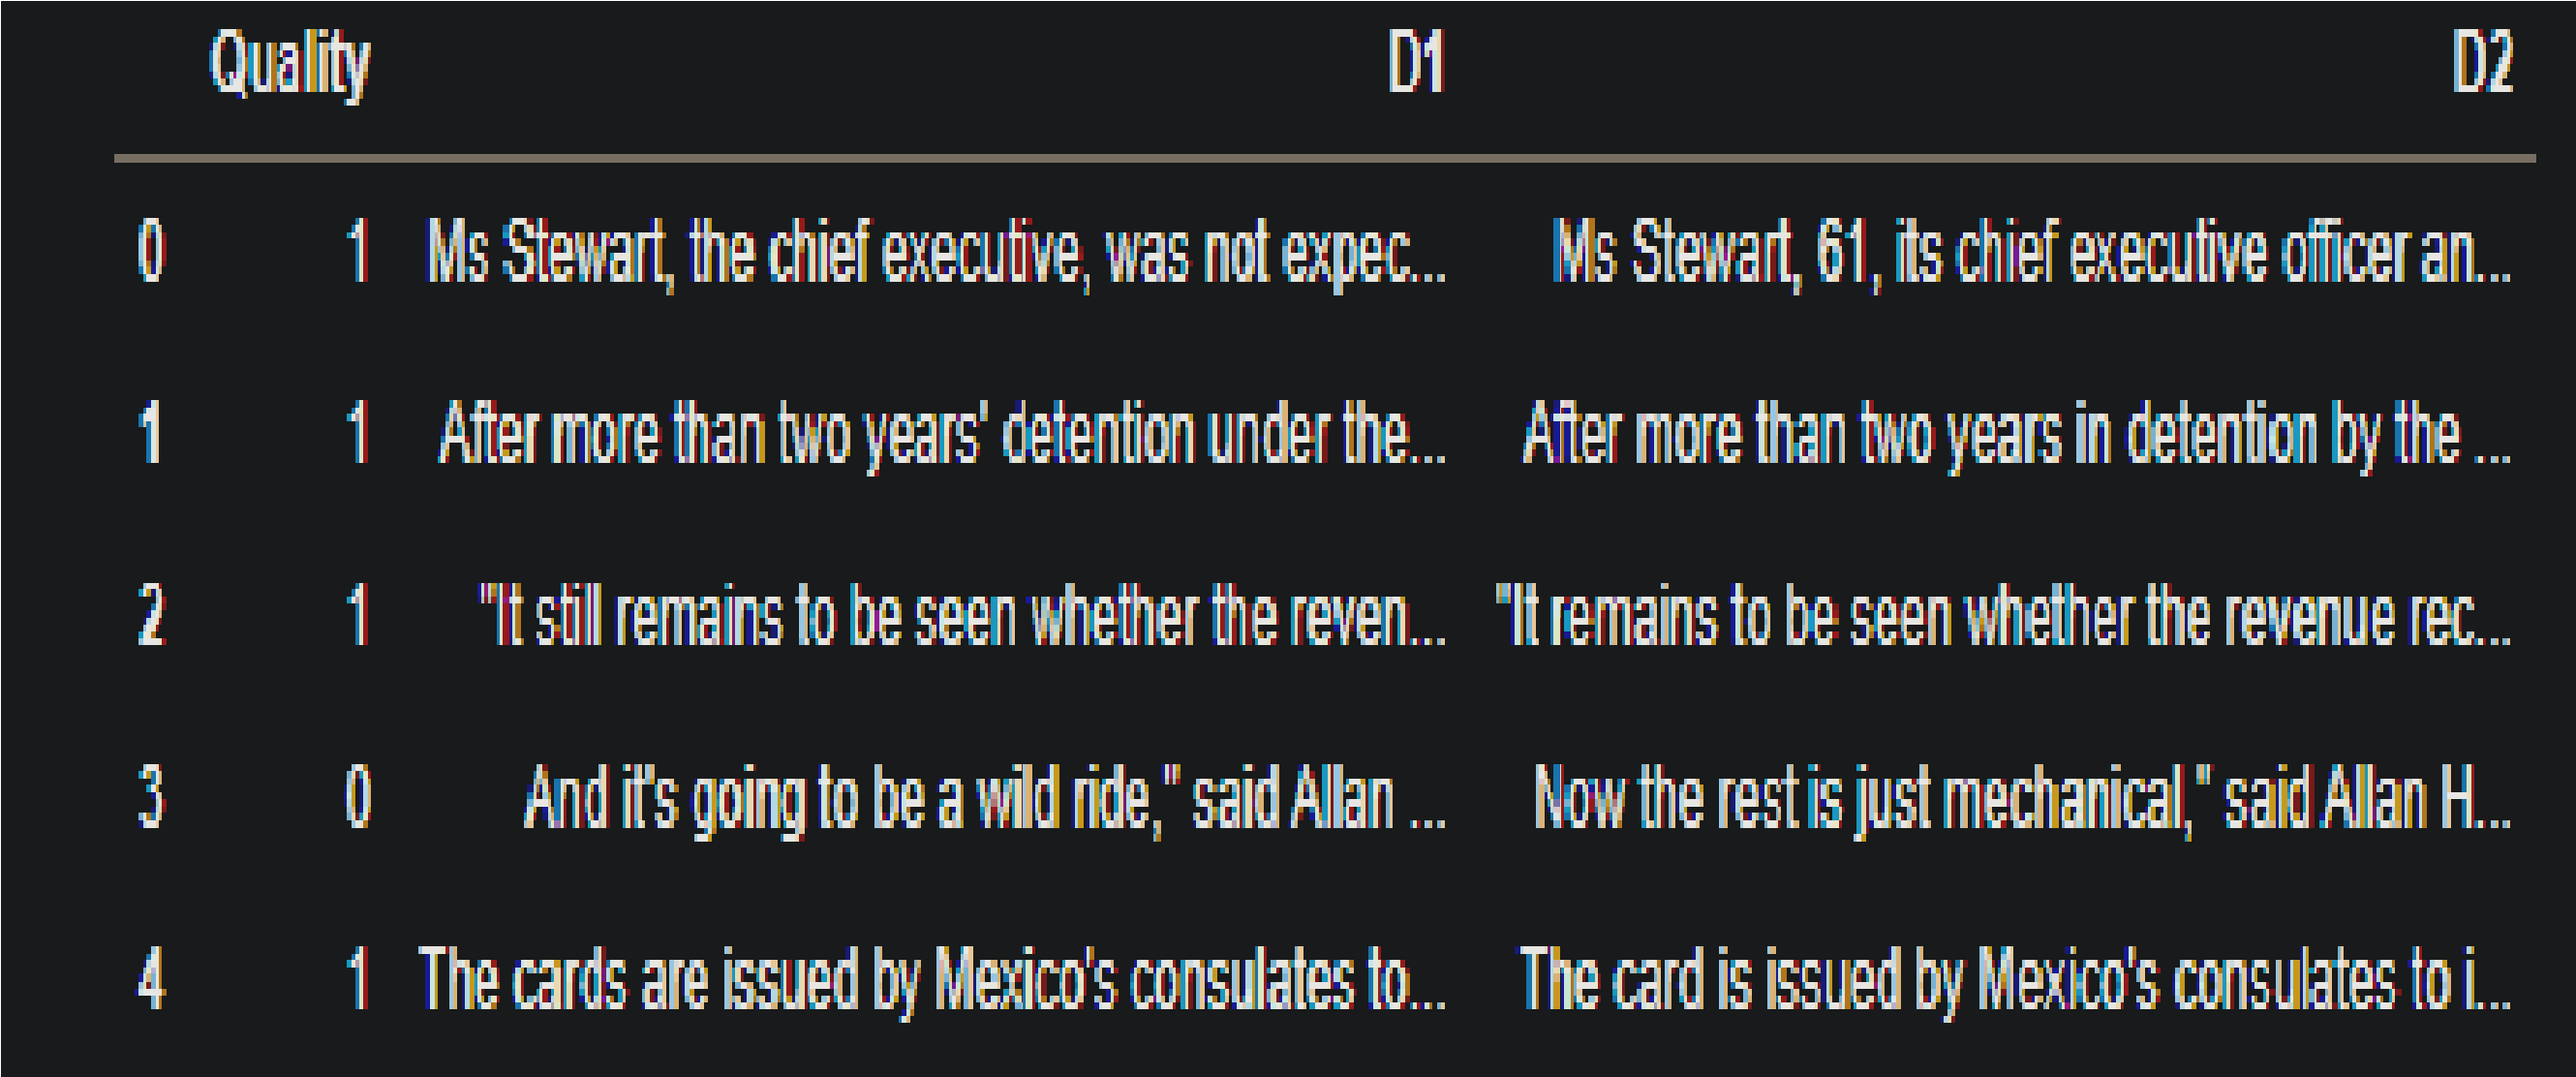

In [ ]:
def most_similar_docs():
    #Using document_path_similarity, find the pair of documents in paraphrases which has the maximum similarity score.
    
    # Your Code Here
    paraphrases['sim']=[document_path_similarity(a,b) for a,b in zip(paraphrases.D1, paraphrases.D2)]
    
    max_score=np.nanmax(np.array(paraphrases.sim,dtype=np.float64))
    
    return paraphrases[paraphrases['sim']==max_score].iloc[:,1:].to_records(index=False).tolist()# Your Answer Here
most_similar_docs()

output:

[("The cards are issued by Mexico's consulates to its citizens living abroad and show the date of birth, a current photograph and the address of the card holder.",
  "The card is issued by Mexico's consulates to its citizens living abroad and shows the date of birth, a current photograph and the address of the cardholder.\n",
  0.9299020910863016)]

In [ ]:
def label_accuracy():
    #Provide labels for the twenty pairs of documents by computing the similarity for each pair using document_path_similarity.
    #Let the classifier rule be that if the score is greater than 0.75, label is paraphrase (1), else label is not paraphrase (0).
    #Report accuracy of the classifier using scikit-learn's accuracy_score.
    
    # Your Code Here
    paraphrases['sim']=[document_path_similarity(a,b) for a,b in zip(paraphrases.D1, paraphrases.D2)]
    
    paraphrases['pred']=np.where(paraphrases.sim>0.75,1,0)
    paraphrases.Quality=paraphrases.Quality.astype(float)
    paraphrases.pred=paraphrases.pred.astype(float)
    return  ac(paraphrases.Quality,paraphrases.pred)  #Your Answer Here
label_accuracy()

output:
0.5

In [ ]:
# Load the list of documents
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(newsgroup_data)

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())

In [ ]:
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

# Your code here:
ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=10,id2word=id_map,passes=25,random_state=34)

In [ ]:
#Using ldamodel, find a list of the 10 topics and the most significant 10 words in each topic.
ldamodel.show_topics(num_topics=10,num_words=10)

output:
[(0,
  '0.056*"edu" + 0.043*"com" + 0.033*"thanks" + 0.022*"mail" + 0.021*"know" + 0.020*"does" + 0.014*"info" + 0.012*"monitor" + 0.010*"looking" + 0.010*"don"'),
 (1,
  '0.024*"ground" + 0.018*"current" + 0.018*"just" + 0.013*"want" + 0.013*"use" + 0.011*"using" + 0.011*"used" + 0.010*"power" + 0.010*"speed" + 0.010*"output"'),
 (2,
  '0.061*"drive" + 0.042*"disk" + 0.033*"scsi" + 0.030*"drives" + 0.028*"hard" + 0.028*"controller" + 0.027*"card" + 0.020*"rom" + 0.018*"floppy" + 0.017*"bus"'),
 (3,
  '0.023*"time" + 0.015*"atheism" + 0.014*"list" + 0.013*"left" + 0.012*"alt" + 0.012*"faq" + 0.012*"probably" + 0.011*"know" + 0.011*"send" + 0.010*"months"'),
 (4,
  '0.025*"car" + 0.016*"just" + 0.014*"don" + 0.014*"bike" + 0.012*"good" + 0.011*"new" + 0.011*"think" + 0.010*"year" + 0.010*"cars" + 0.010*"time"'),
 (5,
  '0.030*"game" + 0.027*"team" + 0.023*"year" + 0.017*"games" + 0.016*"play" + 0.012*"season" + 0.012*"players" + 0.012*"win" + 0.011*"hockey" + 0.011*"good"'),
 (6,
  '0.017*"information" + 0.014*"help" + 0.014*"medical" + 0.012*"new" + 0.012*"use" + 0.012*"000" + 0.012*"research" + 0.011*"university" + 0.010*"number" + 0.010*"program"'),
 (7,
  '0.022*"don" + 0.021*"people" + 0.018*"think" + 0.017*"just" + 0.012*"say" + 0.011*"know" + 0.011*"does" + 0.011*"good" + 0.010*"god" + 0.009*"way"'),
 (8,
  '0.034*"use" + 0.023*"apple" + 0.020*"power" + 0.016*"time" + 0.015*"data" + 0.015*"software" + 0.012*"pin" + 0.012*"memory" + 0.012*"simms" + 0.012*"port"'),
 (9,
  '0.068*"space" + 0.036*"nasa" + 0.021*"science" + 0.020*"edu" + 0.019*"data" + 0.017*"shuttle" + 0.015*"launch" + 0.015*"available" + 0.014*"center" + 0.014*"sci"')]

For the new document new_doc, find the topic distribution. Remember to use vect.transform on the the new doc, and Sparse2Corpus to convert the sparse matrix to gensim corpus:

In [ ]:
new_doc = ["\n\nIt's my understanding that the freezing will start to occur because \
of the\ngrowing distance of Pluto and Charon from the Sun, due to it's\nelliptical orbit. \
It is not due to shadowing effects. \n\n\nPluto can shadow Charon, and vice-versa.\n\nGeorge \
Krumins\n-- "]

In [ ]:
nd=vect.transform(new_doc)
nd=gensim.matutils.Sparse2Corpus(nd,documents_columns=False)
ndm=ldamodel[nd]
list(ndm)[0]

output:
[(0, 0.020001831567137321),
 (1, 0.020002048880398159),
 (2, 0.020000000832383208),
 (3, 0.49627162219642418),
 (4, 0.020002765021576122),
 (5, 0.020002856927867373),
 (6, 0.020001696897618208),
 (7, 0.020001367884601669),
 (8, 0.020001847881941117),
 (9, 0.34371396191005266)]